In [1]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_run_times(fname):
    df = pd.read_csv(fname, sep=' ', names=['nproc', 'run_time'])
    mean = df.groupby('nproc').mean()
    return mean.index, mean['run_time']

<IPython.core.display.Javascript object>


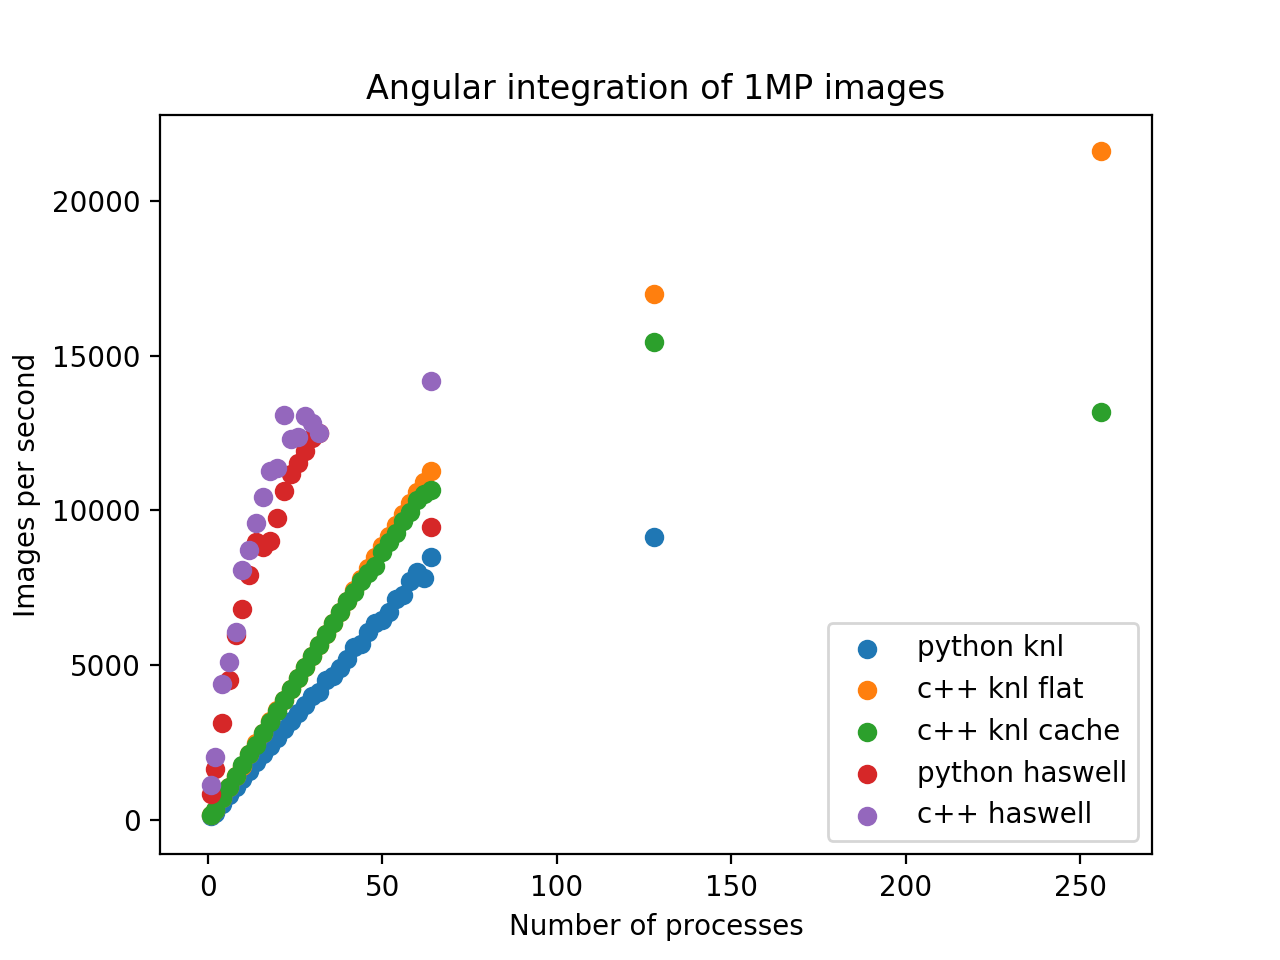

In [8]:
plt.figure()
file_names = ['results-python-knl.txt',
              'results-cpp-knl-flat.txt',
              'results-cpp-knl.txt',
              'results-python-haswell.txt',
              'results-cpp-haswell.txt']

labels = ['python knl',
          'c++ knl flat',
          'c++ knl cache',
          'python haswell',
          'c++ haswell']

for i, fname in enumerate(file_names):
    nproc, run_time = get_run_times(os.path.join('output', fname))
    plt.scatter(nproc, 30 * nproc / run_time, label=labels[i])

plt.legend(loc='lower right')
plt.xlabel('Number of processes')
plt.ylabel('Images per second')
plt.title('Angular integration of 1MP images')
#plt.yscale('log')
plt.savefig('benchmark.png', bbox_inches='tight', dpi=200)